# Importando os dados coletados

In [ ]:
url = 'https://raw.githubusercontent.com/cassiasamp/calculadora-de-imoveis-out-20/main/coleta-de-dados/dados_tratados_mercado_livre.csv'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,zonas,enderecos,precos,areas,quartos
0,sul,"Rua Doutor Ferreira Lopes, Vila Sofia, São Pau...",1100.0,90.0,3.0
1,sul,"Avenida Dos Ourives, Jardim São Savério, São P...",1000.0,63.0,3.0
2,sul,"Rua Doutor Nicolau Alberto Defina, Jardim Da S...",1224.0,68.0,2.0
3,sul,"Avenida Carlos Liviero, Vila Liviero, São Paul...",1300.0,48.0,2.0
4,sul,"Rua Armando Ramos Filho, Moinho Velho, São Pau...",830.0,40.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   zonas      960 non-null    object 
 1   enderecos  960 non-null    object 
 2   precos     960 non-null    float64
 3   areas      960 non-null    float64
 4   quartos    958 non-null    float64
dtypes: float64(3), object(2)
memory usage: 37.6+ KB


In [ ]:
df.isnull().sum()

zonas        0
enderecos    0
precos       0
areas        0
quartos      2
dtype: int64

In [ ]:
df.isna().sum()

zonas        0
enderecos    0
precos       0
areas        0
quartos      2
dtype: int64

In [ ]:
df.shape

(960, 5)

In [ ]:
df = df.fillna(df.median()) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   zonas      960 non-null    object 
 1   enderecos  960 non-null    object 
 2   precos     960 non-null    float64
 3   areas      960 non-null    float64
 4   quartos    960 non-null    float64
dtypes: float64(3), object(2)
memory usage: 37.6+ KB


# Exlporando em aula como faríamos para prever dados da OLX usando os dados que coletamos do Mercado Livre

Apartamentos da OLX que vamos prever:

- Tatuapé, Zona Leste, 3 quartos, 85m2 
    - vamos chutar 4.100, 1320.0 
    - preco real: 2.500
- Jardins, Zona Oeste, 1 quarto, 63m2

Idéias para prever os preços da OLX:

- Agrupar pela zona e ver o preço

### tentando prever o preço por "identidade" vendo se é idêntico ou não - dados de apês que estão próximos
- mesma zona, mesmo valor, mesma área

In [ ]:
# fizemos um primeiro filtro e temos um chute de 5000 reais
df.query('zonas == "leste" and quartos == 3.0 and areas == 85')

,zonas,enderecos,precos,areas,quartos
661,leste,"Rua João Antônio De Oliveira, Moóca, São Paulo...",5000.0,85.0,3.0


In [ ]:
df.query('zonas == "leste" and areas == 85').mean()

precos     4100.0
areas        85.0
quartos       2.5
dtype: float64

### prevendo por semelhança

- vendo se é parecido com valores de apês com dados próximos

In [ ]:
df.query('zonas == "leste" and areas <= 85').median()

precos     1320.0
areas        50.0
quartos       2.0
dtype: float64

### gráfico de linha de tendência 

fórmula da reta para uma variável ou característica: $y = ax + b$
- ou $y = a * quartos + b$

- a = pesos (w) ou coeficientes que alteram a angulação da reta
- b = interceptava o eixo y

fórmula da reta para mais de uma variável: $y = a_0x + a_1z + a_2v + b$
- ou $y = a_0 * quartos  + a_1 * áreas + a_2 * zonas + ... + b$


In [ ]:
df.head(3)

,zonas,enderecos,precos,areas,quartos
0,sul,"Rua Doutor Ferreira Lopes, Vila Sofia, São Pau...",1100.0,90.0,3.0
1,sul,"Avenida Dos Ourives, Jardim São Savério, São P...",1000.0,63.0,3.0
2,sul,"Rua Doutor Nicolau Alberto Defina, Jardim Da S...",1224.0,68.0,2.0


In [ ]:
 # X = zonas, areas, quartos
 # y = precos

In [ ]:
X = df.drop(columns=['enderecos', 'precos'])
# df.drop(['enderecos', 'precos'], axis=1)

In [ ]:
X.head()

,zonas,areas,quartos
0,sul,90.0,3.0
1,sul,63.0,3.0
2,sul,68.0,2.0
3,sul,48.0,2.0
4,sul,40.0,1.0


### Como representar em números?

- Zonas: sul, norte, leste, oeste
  - sul: 1, norte: 2, leste: 3, oeste: 4 - representação (encoding)
  - sul: 0001, norte: 0010, leste: 0100, oeste: 1000

#### na equação: $a_0 * zona$ 
- $a_0$ = 5
- $a_0 * zona_{sul}$ = 5 * 1 = 5
- $a_0 * zona_{norte}$ = 5 * 2 = 10
- $a_0 * zona_{leste}$ = 5 * 3 = 15
- $a_0 * zona_{oeste}$ = 5 * 4 = 20

#### podemos usar one-hot encoding
- sul: 0001, norte: 0010, leste: 0100, oeste: 1000
- para fazer a representação com zeros e uns que é o one hot encoding vamos usar o `pd.get_dummies` 

In [ ]:
# transformamos as nossas variáveis categóricas em numéricas
X = pd.get_dummies(X, columns=['zonas'])

In [ ]:
# variável independente - o que vamos usar para prever
X.head()

,areas,quartos,zonas_leste,zonas_norte,zonas_oeste,zonas_sul
0,90.0,3.0,0,0,0,1
1,63.0,3.0,0,0,0,1
2,68.0,2.0,0,0,0,1
3,48.0,2.0,0,0,0,1
4,40.0,1.0,0,0,0,1


In [ ]:
# variável dependente - o que vamos prever
# y são os preços
y = df['precos']

In [ ]:
y

0      1100.0
1      1000.0
2      1224.0
3      1300.0
4       830.0
        ...  
955    1900.0
956    1960.0
957    1360.0
958    2120.0
959    1550.0
Name: precos, Length: 960, dtype: float64

In [ ]:
X.shape

(960, 6)

In [ ]:
# usar a regressão linear
# usaremos o scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
# ininializando/ criando o modelo
lr = LinearRegression()

In [ ]:
# ajustando a linha aos pontos - ajustat em inglês é fit
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# queremos chutar um preço para -> Zona Leste, 3 quartos, 85m2
# o chutar chama predizer - vamos usar o predict
# predizendo para apenas um dado
# areas	quartos	zonas_leste	zonas_norte	zonas_oeste	zonas_sul

In [ ]:
X.iloc[0].values

array([90.,  3.,  0.,  0.,  0.,  1.])

In [ ]:
import numpy as np
arr = np.array([85, 3, 1, 0, 0, 0])
arr.reshape(1, -1)

array([[85,  3,  1,  0,  0,  0]])

In [ ]:
# [85, 3, 1, 0, 0, 0]
lr.predict([[85, 3, 1, 0, 0, 0]])
# até que está bom para 2.500

array([2213.22434406])

In [ ]:
lr.intercept_ # nosso b

862.2220066747057

In [ ]:
# areas	quartos	zonas_leste	zonas_norte	zonas_oeste	zonas_sul
# nossos azinhos
lr.coef_

array([  16.41684107,  144.97781656, -479.36260338, -422.73299583,
        395.45306664,  506.64253257])

### TODO: próxima aula (terça-feira 02/02/2021)

Fazer a separação dos dados entre treino e teste usando scikit-learn
- train_test_split - como faz para ter sempre a mesma amostra split 

Brincar com os modelos que fazem predição do preço por:
- indentidade: modelo de árvore (DecisionTreeRegressor)
- semelhança: modelo de vizinhos mais próximos (K Kneighbors Regressor)

# Plotando os dados de entrada (nosso x ou características) para entender o que acontece com a distribuição quando aplicamos o log

In [ ]:
import seaborn as sns
import numpy as np

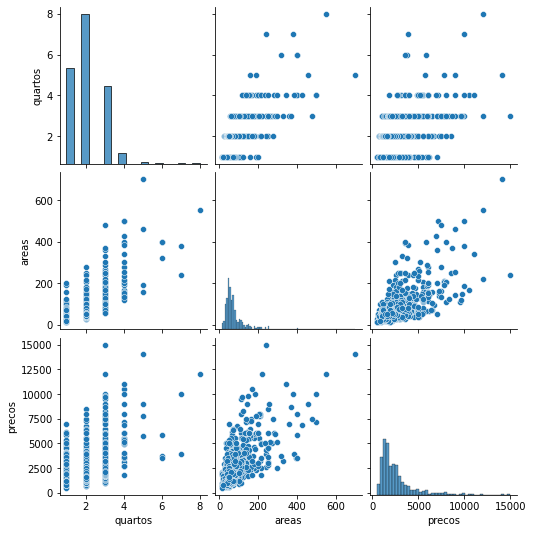

In [ ]:
sns.pairplot(df[['quartos', 'areas', 'precos']])

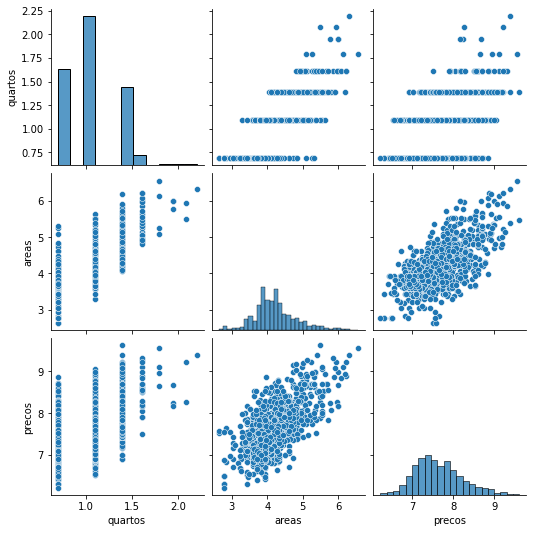

In [ ]:
sns.pairplot(df[['quartos', 'areas', 'precos']].apply(np.log1p))

# Dividindo os dados que coletamos entre treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
SEED = 42
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [ ]:
X_treino.head()

,areas,quartos,zonas_leste,zonas_norte,zonas_oeste,zonas_sul
357,160.0,5.0,0,0,1,0
29,67.0,3.0,0,0,0,1
55,60.0,2.0,0,0,0,1
481,65.0,2.0,1,0,0,0
331,45.0,1.0,0,0,1,0


# Aplicando um modelo de regressão linear nos dados

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_treino = X_treino.apply(np.log1p)

In [ ]:
y_treino = y_treino.apply(np.log1p)

In [ ]:
lr = LinearRegression().fit(X_treino, y_treino)

In [ ]:
y_pred = lr.predict(X_treino)
#y_pred = np.log1p(y_pred)
y_pred_t = lr.predict(X_teste.apply(np.log1p))

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_treino, y_pred)

0.5321237226321226

In [ ]:
lr.score(X_treino, y_treino)

0.5321237226321226

In [ ]:
lr.score(X_teste.apply(np.log1p), y_teste.apply(np.log1p))

0.5530842166471308

# Criando o nosso modelo de regressão "bobinho" que sempre prevê a média para termos uma linha de base

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
dr = DummyRegressor().fit(X_treino, y_treino)

In [ ]:
y_pred_dr = dr.predict(X_treino) 
y_pred_dr_t = dr.predict(X_teste.apply(np.log1p))

In [ ]:
dr.score(X_treino, y_treino)

0.0

## Aplicando o regressor de floresta aleatória

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_treino, y_treino)
y_pred_rf = rf.predict(X_treino)
y_pred_rf_t = rf.predict(X_teste.apply(np.log1p))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fazendo uma triagem de modelos e diferentes métricas para avaliarmos como que os preditores e os dados estão se saindo

In [ ]:
modelos = [dr, lr, rf]
predicoes = [y_pred_dr, y_pred, y_pred_rf]
predicoes_teste = [y_pred_dr_t, y_pred_t, y_pred_rf_t]


for modelo, pred, predt in zip(modelos, predicoes, predicoes_teste):
  print('Treino')
  mae = mean_absolute_error(y_treino, pred)
  mse = mean_squared_error(y_treino, pred)
  r2 = r2_score(y_treino, pred)
  print(modelo.__class__.__name__, \
        '\nr2:', r2, \
        '\nmae:', mae, \
        '\nmse:', mse, \
        '\nmse:',np.sqrt(mse), '\n')
  
  print('Teste')
  mae = mean_absolute_error(y_teste.apply(np.log1p), predt)
  mse = mean_squared_error(y_teste.apply(np.log1p), predt)
  r2 = r2_score(y_teste.apply(np.log1p), predt)
  print(modelo.__class__.__name__, \
        '\nr2:', r2, \
        '\nmae:', mae, \
        '\nmse:', mse, \
        '\nmse:',np.sqrt(mse), '\n')


Treino
DummyRegressor 
r2: 0.0 
mae: 0.4594185524431904 
mse: 0.3292474718124811 
mse: 0.5738008991039323 

Teste
DummyRegressor 
r2: -0.001398828724613388 
mae: 0.47507150607835924 
mse: 0.3512785297681219 
mse: 0.5926875481804236 

Treino
LinearRegression 
r2: 0.5321237226321226 
mae: 0.31061099835823586 
mse: 0.1540470814444088 
mse: 0.39248832013756635 

Teste
LinearRegression 
r2: 0.5530842166471308 
mae: 0.31507775527841475 
mse: 0.1567726212605122 
mse: 0.39594522507603525 

Treino
RandomForestRegressor 
r2: 0.8176020867206382 
mae: 0.18334648235466028 
mse: 0.060054051811102065 
mse: 0.24505928223820062 

Teste
RandomForestRegressor 
r2: 0.4623108715022648 
mae: 0.3464972818340046 
mse: 0.18861480672145783 
mse: 0.43429806207426 



# Vendo o score de validação além dos scores de treino e teste

In [ ]:
from sklearn.model_selection import cross_val_score

modelos = [dr, lr, rf]

for modelo in modelos:
  cv  = cross_val_score(modelo, X_treino, y_treino, cv=10)
  print(modelo.__class__.__name__, \
        '\n cv score:', np.mean(cv))

DummyRegressor 
 cv score: -0.012659287247249695
LinearRegression 
 cv score: 0.5126662494089673
RandomForestRegressor 
 cv score: 0.45869307423595435


# Fazendo a busca de hiperparâmetros para melhorar o nosso modelo (no caso, o de floresta aleatória)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_params = {'n_estimators':[100, 150, 200, 500, 600],
             'max_depth':[5, 10, 15, 20, 30],
             'random_state': [SEED]}

gs = GridSearchCV(rf, rf_params, cv=5, verbose=2, scoring='r2')

In [ ]:
gs.fit(X_treino, y_treino)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] max_depth=5, n_estimators=100, random_state=42 ..................
[CV] ... max_depth=5, n_estimators=100, random_state=42, total=   0.2s
[CV] max_depth=5, n_estimators=100, random_state=42 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ... max_depth=5, n_estimators=100, random_state=42, total=   0.2s
[CV] max_depth=5, n_estimators=100, random_state=42 ..................
[CV] ... max_depth=5, n_estimators=100, random_state=42, total=   0.2s
[CV] max_depth=5, n_estimators=100, random_state=42 ..................
[CV] ... max_depth=5, n_estimators=100, random_state=42, total=   0.2s
[CV] max_depth=5, n_estimators=100, random_state=42 ..................
[CV] ... max_depth=5, n_estimators=100, random_state=42, total=   0.2s
[CV] max_depth=5, n_estimators=150, random_state=42 ..................
[CV] ... max_depth=5, n_estimators=150, random_state=42, total=   0.3s
[CV] max_depth=5, n_estimators=150, random_state=42 ..................
[CV] ... max_depth=5, n_estimators=150, random_state=42, total=   0.2s
[CV] max_depth=5, n_estimators=150, random_state=42 ..................
[CV] ... max_depth=5, n_estimators=150, random_state=42, total=   0.3s
[CV] max_depth=5, n_estimators=150, random_state=42 ..................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 600, 'random_state': 42}

In [ ]:
gs.best_score_

0.5212858268507274

In [ ]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

# Salvando o melhor modelo e exportando esse modelo para um arquivo binário do tipo pickle

In [ ]:
modelo_final = gs.best_estimator_

In [ ]:
import pickle

In [ ]:
#with open('modelo_final.pkl', 'wb') as arquivo:
 # pickle.dump(modelo_final, arquivo)

pickle.dump(modelo_final, open('modelo_f.pkl', 'wb'))

In [ ]:
#with open('modelo_final.pkl', 'rb') as f:
 # modelo = pickle.load(f)

modelo = pickle.load(open('modelo_f.pkl', 'rb'))

In [ ]:
modelo.score(X_treino, y_treino)

0.6324394921617409

In [ ]:
modelo.score(np.log1p(X_teste), np.log1p(y_teste))

0.5482315236036348